<a href="https://colab.research.google.com/github/zqngetsu96/DataInsight_Assignments_and_projects/blob/main/Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization,Conv2D,Dense,LSTM,Dropout,Input,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np


# **MLP Model** (Iris)
**Sequential API**

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
y = to_categorical(y) ##One hot encoding of Y

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3)
scaler = StandardScaler().fit(X_train) #Fit a scaler for 
X_train_scaled = scaler.transform(X_train) #Transform training data
X_test_scaled = scaler.transform(X_test) #Transform testing data

In [3]:
model = Sequential()
model.add(Dense(32, input_shape=(4,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()
# Compile model
model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
hist = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
4/4 [==============================] - 1s 61ms/step - loss: 1.1396 - accuracy: 0.5810 - val_loss: 1.0819 - val_accuracy: 0.6667
Epoch 2/15
4/4 [==============================]

**Functional API**

In [4]:
input = Input((4,))
x = Dense(32, activation='relu')(input)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=[input],outputs=[output])
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=50)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 55ms/s

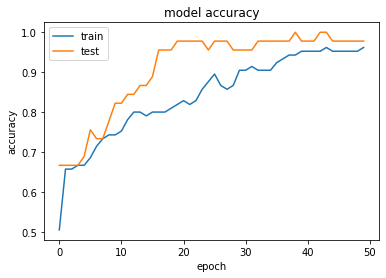

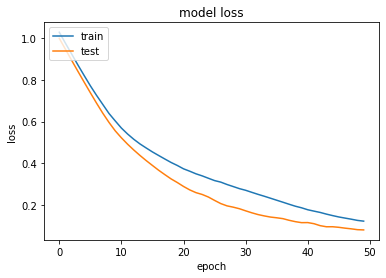

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# MNIST DATASET
**Convulutional neural network**

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255 #normalize the pixels' values to 0-1 range
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1) #The input shape for Conv2D is (H,W,1) or (H,W,N) in general N=3
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
y_train = to_categorical(y_train, 10) #We change our labels to One hot encoding format with 10 classes (10 digits 0-9)
y_test = to_categorical(y_test, 10)

(60000, 28, 28, 1)


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) #Maxpooling down samples the received input by a factor of two while selecting the pixels with the maximum values in each patch.
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()
e_s = EarlyStopping(min_delta = 0.0005, patience = 2)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[e_s],validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

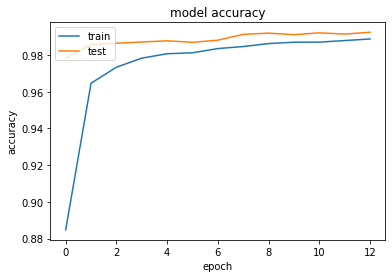

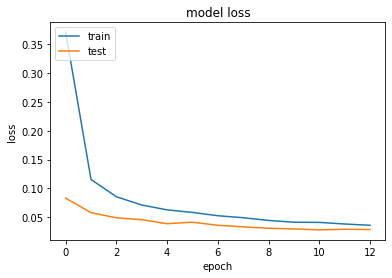

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
performance = model.evaluate(x_test,y_test)
print("The test loss is %.2f" % performance[0])
print("The test accuracy is %.2f" % (performance[1]*100) + "%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9908
The test loss is 0.03
The test accuracy is 99.08%
